In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [2]:
data = tf.keras.datasets.fashion_mnist
(xtrain, ytrain),(xtest,ytest) = data.load_data()

In [3]:
xtrain.shape,ytrain.shape

((60000, 28, 28), (60000,))

In [4]:
xtest.shape,ytest.shape

((10000, 28, 28), (10000,))

In [5]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
class_names=['T-shirt/top','Trouser','Pullover','Dress',"Coat",'Sandal','Shirt','Sneaker','Bag','Ankle boot']

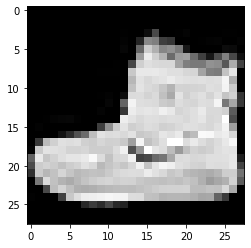

In [7]:
plt.imshow(xtrain[0],cmap = "gray")

In [8]:
#scaling the data
xtrain = xtrain/255.0
xtest = xtest/255.0

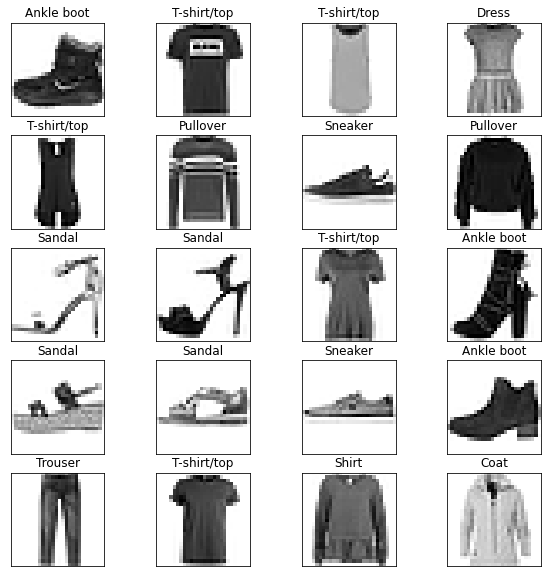

In [9]:
plt.figure(figsize = (10,10))
for i in range(20):
    plt.subplot(5, 4, i+1) #5rows, 4cols
    plt.imshow(xtrain[i], cmap = plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[ytrain[i]])

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), optimizer = "adam", metrics = ["accuracy"])

In [12]:
model.fit(xtrain,ytrain,epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6296 - accuracy: 0.7816
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3839 - accuracy: 0.8605
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3328 - accuracy: 0.8792
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3116 - accuracy: 0.8863
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2999 - accuracy: 0.8891
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2776 - accuracy: 0.8976
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2688 - accuracy: 0.9000
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2564 - accuracy: 0.9042
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2430 - accuracy: 0.9085
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [13]:
train_loss,train_acc = model.evaluate(xtrain, ytrain)
print("Trainin Accuracy is {} and Loss is {}".format(train_acc, train_loss))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.1332 - accuracy: 0.9484: 
Trainin Accuracy is 0.9483500123023987 and Loss is 0.13321834802627563


In [14]:
test_loss,test_acc = model.evaluate(xtest, ytest)
print("Testing Accuracy is {} and Loss is {}".format(test_acc,test_loss))

313/313 [==============================] - 1s 2ms/step - loss: 0.3960 - accuracy: 0.8913
Testing Accuracy is 0.8913000226020813 and Loss is 0.3960380256175995


#### Predictions
Converting logits to probabilities.

In [15]:
probabolity_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [16]:
pred = probabolity_model.predict(xtest)

In [17]:
pred

array([[2.1550171e-11, 7.6509850e-16, 7.3220423e-12, ..., 1.7898680e-03,
        6.5499611e-10, 9.9820781e-01],
       [3.3443936e-08, 1.3865075e-20, 9.9671787e-01, ..., 4.3635597e-19,
        3.1245152e-15, 1.3024481e-21],
       [8.1244302e-22, 1.0000000e+00, 2.6050566e-23, ..., 4.7748540e-35,
        8.9629624e-21, 1.1878040e-33],
       ...,
       [1.2774399e-09, 9.4404676e-23, 1.7597150e-12, ..., 1.0916579e-18,
        9.9999917e-01, 1.8968375e-25],
       [2.1807426e-14, 1.0000000e+00, 1.4449420e-14, ..., 2.0649007e-23,
        3.4241839e-12, 3.8642700e-14],
       [1.6499456e-10, 1.5733104e-15, 6.8039629e-11, ..., 1.4735555e-07,
        6.9893686e-09, 9.5861340e-13]], dtype=float32)

In [18]:
#array for the first image. We can see 10 log values. Jiska sabse jyada confidence rahega that'll be thee label of the class
pred[0]

array([2.1550171e-11, 7.6509850e-16, 7.3220423e-12, 8.0049645e-15,
       6.3929514e-17, 2.2992572e-06, 3.6447489e-09, 1.7898680e-03,
       6.5499611e-10, 9.9820781e-01], dtype=float32)

In [19]:
np.argmax(pred[0])

9

In [20]:
class_names[9]

'Ankle boot'

In [21]:
# accesing ytest's 0
ytest [0]

9

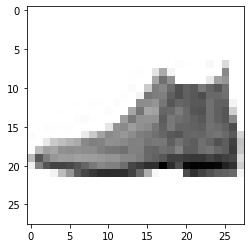

In [22]:
#Display the O/P
plt.imshow(xtest[0],cmap = plt.cm.binary)

In [23]:
def plot_image(i,pred,ytest,xtest):
    img = xtest[i]
    actual = ytest[i]
    predicted = np.argmax(pred[i])
    plt.imshow(img, cmap = plt.cm.binary)
    plt.xticks([])
    # plt.yticks([])
    if actual == predicted:
        color = "g"
    else:
        color = "r"
    plt.xlabel("{} with {:.2f}% Accuracy ".format(class_names[predicted],100*np.max(pred[i])),color = color)

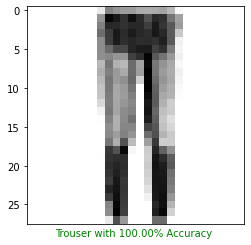

In [24]:
plot_image(3, pred, ytest, xtest)

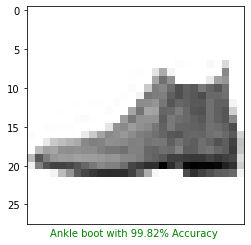

In [25]:
plot_image(0, pred, ytest, xtest)

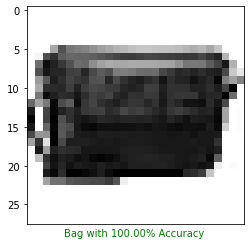

In [26]:
plot_image(56, pred, ytest, xtest)

In [27]:
def plot_acc(i, pred, ytest):
    actual = ytest[i]
    predicted = np.argmax(pred[i])
    bplot = plt.bar(range(10), pred[i], color = "b")
    plt.ylim([0,1])
    bplot[predicted].set_color("r")
    bplot[actual].set_color("g")
    plt.xticks(range(10))

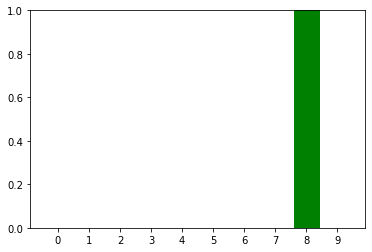

In [28]:
plot_acc(56,pred,ytest)

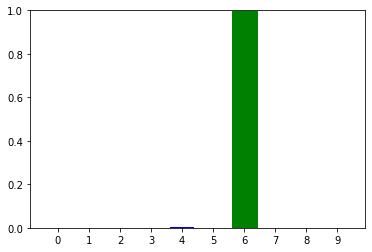

In [29]:
plot_acc(988,pred,ytest)

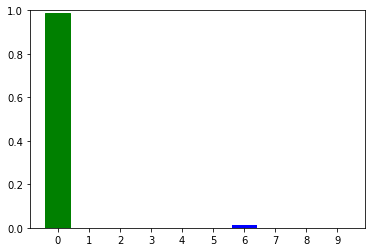

In [30]:
plot_acc(6533,pred,ytest)

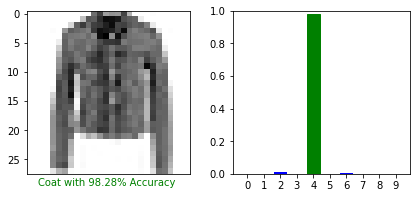

In [31]:
i = 10
plt.figure(figsize = (7,3))
plt.subplot(1,2,1) #1row, 2 cols
plot_image(i,pred,ytest,xtest)
plt.subplot(1,2,2)
plot_acc(i,pred,ytest)

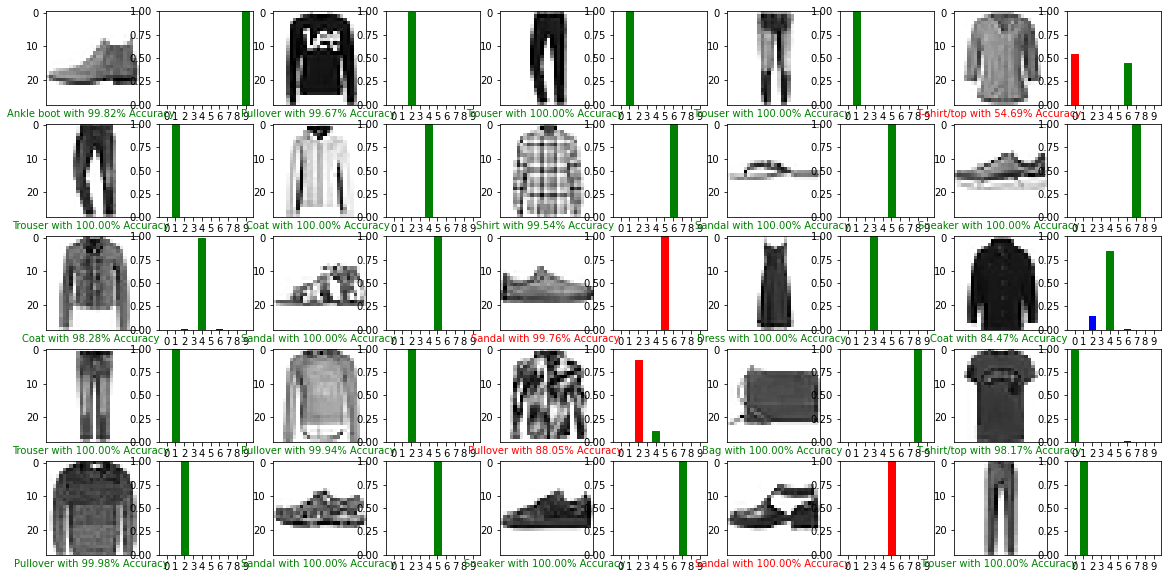

In [32]:
r = 5
c = 5
n = r*c
plt.figure(figsize = (2*2*c, 2*r))
for i in range(n):
    plt.subplot(r,2*c,2*i+1)
    plot_image(i, pred, ytest, xtest)
    plt.subplot(r,2*c,2*i+2)
    plot_acc(i,pred,ytest)